## Principal Component Analysis (PCA)- Faulty Steel Plates

In [1]:
import pandas as pd
column_name=pd.read_excel('MDS_Assignment2_Steelplates.xlsx',"Var_Name",header=None)
steelplates=pd.read_excel('MDS_Assignment2_Steelplates.xlsx',"Faults",header=None)
steelplates.columns=column_name[0]
steelplates

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


### split the dataset into training and testing sets

In [2]:
import sklearn.model_selection as model_selection

X=steelplates.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"],axis=1)
y=steelplates['Bumps']
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y, test_size=0.2)

### Predict the "Bumps" by LogisticRegression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

reg=LogisticRegression()
reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)

score=reg.score(X_test, y_test)
print("accuracy: ",score)

confusion_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",confusion_matrix)

accuracy:  0.7686375321336761
confusion matrix: 
 [[298   2]
 [ 88   1]]


### Standardize

In [4]:
from sklearn.preprocessing import StandardScaler

PCA_X_Before=steelplates.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","TypeOfSteel_A300","TypeOfSteel_A400","Outside_Global_Index",],axis=1)

sc=StandardScaler()
PCA_X_Before=sc.fit_transform(PCA_X_Before)
PCA_X_Before

array([[-1.01648138, -1.14163891, -0.77772863, ...,  1.46765551,
        -1.0757517 , -0.00948966],
       [ 0.14189427,  0.06640322,  0.50018799, ...,  1.4175296 ,
        -0.2978242 , -0.845759  ],
       [ 0.49536213,  0.43625306, -0.05454637, ...,  1.16510269,
         0.05718506, -1.09151256],
       ...,
       [-0.81861622, -0.89239228, -0.71241235, ..., -1.13050437,
         0.91781358,  0.3609087 ],
       [-0.83398438, -0.9004325 , -0.69227956, ..., -0.28735056,
         0.76787595,  1.19776737],
       [ 1.32524319,  1.3327369 , -0.88084954, ..., -0.5657391 ,
         0.11702564, -0.16448532]])

### PCA

In [5]:
from sklearn.decomposition import PCA
import numpy as np

pca=PCA()
PCA_X=pca.fit_transform(PCA_X_Before)
print("Eigenvalue\n",np.round(pca.explained_variance_,decimals=2),"\n")

for i in range(24):
    print("Eigenvectors( PC",i+1,")\n",np.round(pca.components_[i],decimals=5))

Eigenvalue
 [8.02 2.93 2.32 2.2  1.75 1.54 0.96 0.92 0.87 0.74 0.61 0.35 0.29 0.2
 0.11 0.08 0.06 0.05 0.02 0.01 0.   0.   0.   0.  ] 

Eigenvectors( PC 1 )
 [-0.18598 -0.15047  0.01561  0.01564  0.29275  0.27231  0.18433  0.30461
 -0.22771  0.00852 -0.09948 -0.07985 -0.16023  0.1694  -0.05415  0.27049
 -0.16117 -0.25046  0.32633  0.31154  0.28175 -0.07729 -0.05137  0.27703]
Eigenvectors( PC 2 )
 [ 0.11384  0.09487 -0.04934 -0.04934 -0.03667 -0.03131  0.01833 -0.05065
 -0.24038 -0.38804  0.14104  0.22023 -0.10895 -0.02953 -0.17009 -0.15
 -0.32229  0.24818  0.07133 -0.13666  0.25731  0.42971 -0.41183  0.13165]
Eigenvectors( PC 3 )
 [-0.07031 -0.09105 -0.49822 -0.49818  0.09316  0.12014  0.15657  0.08214
  0.23565  0.29255 -0.04022  0.18113  0.04035  0.1135  -0.02775 -0.10792
 -0.21227  0.09338 -0.03783 -0.12149  0.09583  0.23248  0.31665 -0.00693]
Eigenvectors( PC 4 )
 [ 0.31123  0.31866  0.15722  0.15733  0.33716  0.38195  0.46672  0.27334
 -0.00669  0.0576   0.16637 -0.03705  0.14556 

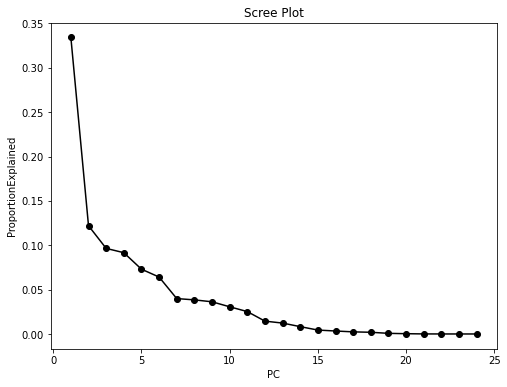

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

X_label=[]
for i in range(24):
    X_label.append(i+1)

plt.figure(figsize=(8,6))

plt.plot(X_label,pca.explained_variance_ratio_, 'ko-')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('ProportionExplained')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix

pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

reg=LogisticRegression()
reg.fit(X_train_pca, y_train)

y_pred=reg.predict(X_test_pca)

score=reg.score(X_test_pca, y_test)
print("accuracy: ",score)

confusion_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",confusion_matrix)

accuracy:  0.6529562982005142
confusion matrix: 
 [[187 113]
 [ 22  67]]
